**1.0 DATA PROCESSING**

In [ ]:
import cv2,os

data_path='/content/drive/MyDrive/Colab Notebooks/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

**2.0 TRANING THE CNN**

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7355 - accuracy: 0.5323

31/31 [==============================] - 94s 3s/step - loss: 0.7355 - accuracy: 0.5323 - val_loss: 0.6587 - val_accuracy: 0.6089
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.6277 - accuracy: 0.6606

31/31 [==============================] - 89s 3s/step - loss: 0.6277 - accuracy: 0.6606 - val_loss: 0.5354 - val_accuracy: 0.7984
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.4470 - accuracy: 0.7949

31/31 [==============================] - 94s 3s/step - loss: 0.4470 - accuracy: 0.7949 - val_loss: 0.3390 - val_accuracy: 0.8306
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.3047 - accuracy: 0.8697

31/31 [==============================] - 83s 3s/step - loss: 0.3047 - accuracy: 0.8697 - val_loss: 0.1907 - val_accuracy: 0.9476
Epoch 5/20
31/31 [==============================] - 83s 3s/step - loss: 0.2204 - accuracy: 0.9162 - val_loss: 0.2045 - val_accuracy: 0.9153
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1810 - accuracy: 0.9303

31/31 [==============================] - 81s 3s/step - loss: 0.1810 - accuracy: 0.9303 - val_loss: 0.1456 - val_accuracy: 0.9597
Epoch 7/20
31/31 [==============================] - 82s 3s/step - loss: 0.1288 - accuracy: 0.9505 - val_loss: 0.1651 - val_accuracy: 0.9234
Epoch 8/20
31/31 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9455

31/31 [==============================] - 81s 3s/step - loss: 0.1307 - accuracy: 0.9455 - val_loss: 0.1184 - val_accuracy: 0.9677
Epoch 9/20
31/31 [==============================] - ETA: 0s - loss: 0.0780 - accuracy: 0.9747

31/31 [==============================] - 80s 3s/step - loss: 0.0780 - accuracy: 0.9747 - val_loss: 0.0873 - val_accuracy: 0.9798
Epoch 10/20
31/31 [==============================] - 84s 3s/step - loss: 0.0755 - accuracy: 0.9727 - val_loss: 0.0978 - val_accuracy: 0.9677
Epoch 11/20
31/31 [==============================] - 80s 3s/step - loss: 0.0471 - accuracy: 0.9859 - val_loss: 0.0878 - val_accuracy: 0.9798
Epoch 12/20
31/31 [==============================] - 82s 3s/step - loss: 0.0602 - accuracy: 0.9788 - val_loss: 0.1066 - val_accuracy: 0.9718
Epoch 13/20
31/31 [==============================] - 80s 3s/step - loss: 0.0715 - accuracy: 0.9768 - val_loss: 0.1968 - val_accuracy: 0.9274
Epoch 14/20
31/31 [==============================] - 80s 3s/step - loss: 0.0714 - accuracy: 0.9717 - val_loss: 0.1102 - val_accuracy: 0.9677
Epoch 15/20
31/31 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9848

31/31 [==============================] - 82s 3s/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.0849 - val_accuracy: 0.9839
Epoch 16/20
31/31 [==============================] - 80s 3s/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.1102 - val_accuracy: 0.9798
Epoch 17/20
31/31 [==============================] - 82s 3s/step - loss: 0.0352 - accuracy: 0.9919 - val_loss: 0.0986 - val_accuracy: 0.9758
Epoch 18/20
31/31 [==============================] - 80s 3s/step - loss: 0.0389 - accuracy: 0.9899 - val_loss: 0.1094 - val_accuracy: 0.9758
Epoch 19/20
31/31 [==============================] - 80s 3s/step - loss: 0.0442 - accuracy: 0.9838 - val_loss: 0.0973 - val_accuracy: 0.9798
Epoch 20/20
31/31 [==============================] - 82s 3s/step - loss: 0.0370 - accuracy: 0.9869 - val_loss: 0.0887 - val_accuracy: 0.9718


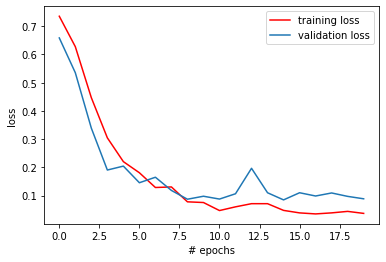

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

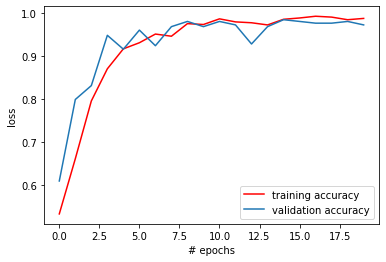

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 541ms/step - loss: 0.1893 - accuracy: 0.9493
[0.189256951212883, 0.9492753744125366]


**3.0 DETECTING MASKS**

In [3]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model('model-017.model')

face_clsfr=cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()